### PCA

**P**rincipal **C**omponent **A**nalysis (Hauptkomponenten - Analyse) wird verwendet, um einen multivariaten Datensatz in einen Satz aufeinanderfolgender orthogonaler Komponenten zu zerlegen, die den maximalen Betrag der Varianz erklären. In scikit-learn wird PCA als $transformer$-Objekt implementiert, das $n$-Komponenten in seiner Anpassungsmethode lernt und für neue Daten verwendet werden kann, um sie auf diese Komponenten zu projizieren.

PCA zentriert die Eingabedaten für jedes Feature, skaliert sie jedoch nicht, bevor die SVD angewendet wird. Der optionale Parameter $whiten=True$ ermöglicht es, die Daten auf den singulären Raum zu projizieren, während jede Komponente auf Einheitsvarianz skaliert wird. Dies ist häufig nützlich, wenn die nachgeschalteten Modelle starke Annahmen über die Isotropie des Signals treffen: Dies ist beispielsweise bei Support Vector Machines mit dem RBF-Kernel und dem K-Means-Clustering-Algorithmus der Fall.

Weitere Informationen zu scikit-learn: [scikit-learn.PCA](https://scikit-learn.org/stable/modules/decomposition.html#pca)

<a id="iris"> **Iris-Datensatz** </a><br>
In diesem notebook wird der 'Iris'-Datensatz verwendet, um verschiedene Arten von Datenvisualisierungen zu demonstrieren.

"Der Iris-Datensatz oder der Fisher's Iris-Datensatz ist ein multivariater Datensatz, den der britische Statistiker, Eugeniker und Biologe Ronald Fisher in seiner Arbeit von 1936 eingeführt hat. Die Verwendung von Mehrfachmessungen bei taxonomischen Problemen als Beispiel für eine lineare Diskriminanzanalyse manchmal als Andersons Iris-Datensatz bezeichnet, weil Edgar Anderson die Daten sammelte, um die morphologische Variation von Schwertlilienblüten von drei verwandten Arten zu quantifizieren. Zwei der drei Arten wurden auf der Gaspé-Halbinsel "alle von derselben Weide gesammelt und am selben Tag gepflückt und zur gleichen Zeit von derselben Person mit demselben Apparat gemessen ". Fischers Artikel wurde in der Zeitschrift Annals of Eugenics veröffentlicht, was zu Kontroversen über die weitere Verwendung des Iris-Datensatzes in der Lehre statistischer Techniken von heute führte.

Der Datensatz besteht aus 50 Proben von jeweils drei Irisarten (Iris setosa, Iris virginica und Iris versicolor). Von jeder Probe wurden vier Merkmale gemessen: die Länge und die Breite der Kelchblätter und Blütenblätter in Zentimetern. Basierend auf der Kombination dieser vier Merkmale entwickelte Fisher ein lineares Diskriminanzmodell, um die Arten voneinander zu unterscheiden. ", Wikipedia [link](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In scikit-learn ist der Datensatz ein Objekt der Klasse [Bunch](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch).Ein Container-Objekt, das Schlüssel als Attribute enthält.<br>
Detaillierte Beschreibung des Iris-Datensatzes auf scikit-learn: [iris_datensatz](https://scikit-learn.org/stable/datasets/index.html#iris-dataset)

In [1]:
# iris-datensatz laden und in ein pandas-Datenframe überführen
#
from sklearn.datasets import load_iris
import pandas as pd
#
# numerische daten und iris-Klassennamen in einen Datenrahmen zusammenführen:
#
skBunch_iris = load_iris()
df_man = pd.DataFrame(skBunch_iris['data'], columns=skBunch_iris['feature_names'])
#
targets = skBunch_iris['target'] #Klassenbezeichnungen werden durch die Zahlen 0,1,2 ['setosa', 'versicolor', 'virginica'] repräsentiert
target_names = skBunch_iris['target_names'] # Klassenbezeichnungen ['setosa', 'versicolor', 'virginica']
#
df_man['class'] = target_names[targets] # Klassenbezeichnungen entsprechend der (target) Nummer zuordnen
#
# die Datenrahmen-Methode 'head(n=5)' gibt n-Zeilen des Datenrahmens zurück
df_man.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Visualisieren des Iris-Datensatz**

Aus den 4 Merkmalsvariablen werden die Kelchblattlänge und -breite in einem Scatter-Diagramm wie folgt angezeigt:

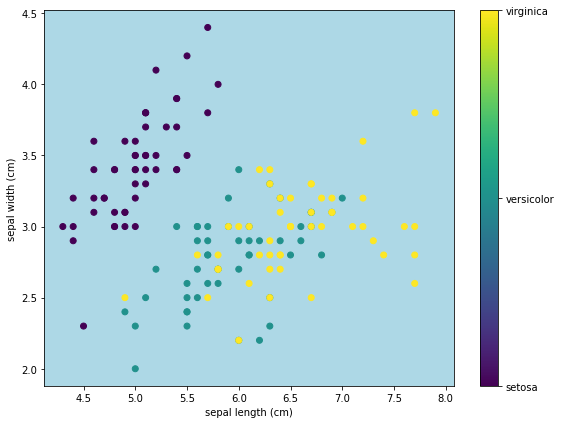

In [2]:
import matplotlib.pyplot as plt
#
#
# dieser Formatierer wird den Farbbalken mit den korrekten Zielnamen beschriften
formatter = plt.FuncFormatter(lambda i, *args: skBunch_iris.target_names[int(i)])

plt.figure(figsize=(8, 6))
plt.scatter(df_man['sepal length (cm)'], df_man['sepal width (cm)'], c=targets)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.set_xticks =[]
plt.set_yticks = []
plt.gca().set_facecolor('lightblue')
plt.tight_layout()
plt.show()

**Klassifizierung mit KNeighbours-Classifier**

Parameter:<br>
[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier):
- n_neighbors = 15$\quad$ Anzahl der Nachbarn, die standardmäßig für Kneighbors-Abfragen verwendet werden.
- weight = 'distance' $\quad$ Gewichtspunkte durch Umkehrung ihrer Entfernung. In diesem Fall haben engere Nachbarn eines Abfragepunkts einen größeren Einfluss als weiter entfernte Nachbarn.

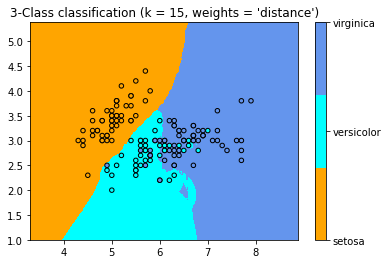

In [3]:
from numpy import arange, meshgrid, c_
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
#
#
# parameters
nNeighbors = 15
weight = 'distance'
#
#
# X und y- Werte aus dem iris-Datensatzes extrahieren:
X = skBunch_iris.data[:, :2] # die ersten beiden Merkmale laden
y = skBunch_iris.target      # targets = Klassennamen

# Netzgitter erstellen um das Modell auswerten zu können
#
# Abstandsmaß im Netzgitter
h=0.02
#
# die Extrema in beiden Merkmalen finden, um die Größe des Maschengitters zu definieren
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = meshgrid(arange(x_min, x_max, h), arange(y_min, y_max, h))
#
#
# KNeighborsClassifier Instanz
KN = KNeighborsClassifier(n_neighbors=nNeighbors, weights=weight)
#
# die Daten in einen Trainingssatz und einen Testsatz teilen
# test_size: 0.33 : 1/3 aller Datenpunkte wird für den Testsatz verwendet. 2/3 werden zum trainieren des models genutzt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)
#
# model anpassen
KN.fit(X_train,y_train)
#
# ravel(): die Gittermatrix in einen Zeilenvektor transformieren
# np.c_[x,y] : Erstellen eines zweidimensionalen Arrays mit x- und y-Spalten. 
#              Die Vektoren x und y werden jeweils mit der Funktion ravel() in ein aufeinanderfolgende Reihe zusammengefügt.
#
# Entscheidungsgrenze als farbigen Bereich einzeichnen. Hierzu weisen wir jedem Punkt im Maschengitter eine Farbe zu
#
Z = KN.predict(c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)  # den Spaltenvektor von predict(X) auf die Größe des Maschengitters umformen
#
# Voreinstellung der Diagramme:
# color map erstellen
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
#
# dieser Formatierer wird den Farbbalken mit den korrekten Zielnamen beschriften
formatter = plt.FuncFormatter(lambda i, *args: skBunch_iris.target_names[int(i)])
#
# Entscheidungsgrenzen darstellen
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# trainingsdatensatz darstellen
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_light, edgecolor='k', s=20)
# colorbar hinzufuegen
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (nNeighbors, weight))
#
plt.show()

**confusion matrix**

Die confusion matrix zu den oben klassifizierten Daten wird dargestellt:

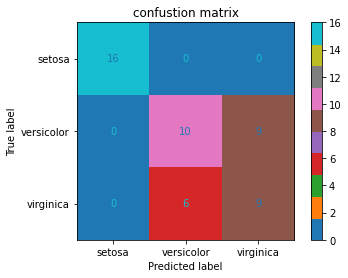

In [4]:
# confusion matrix nach dem Beispiel auf:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from numpy import set_printoptions

# die Klassenbezeichnungen laden
class_names = skBunch_iris['target_names']

# Klassifikator ausführen, wobei ein zu stark reglementiertes Modell verwendet wird (C zu niedrig),
# um die Auswirkungen auf die Ergebnisse zu sehen
classifier = KNeighborsClassifier(n_neighbors=nNeighbors, weights=weight).fit(X_train, y_train)

set_printoptions(precision=2)

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(classifier, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.tab10,
                             normalize=None)
disp.ax_.set_title("confustion matrix")

plt.show()

**PCA durchführen**

vor dem Clustering eine PCA durchführen.

Parameter:<br>
[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier):
- n _neighbors = 15$\quad$ Anzahl der Nachbarn, die standardmäßig für Knienachbarabfragen verwendet werden sollen.
- weight = 'distance' $\quad$ Gewichtspunkte durch Umkehrung ihrer Entfernung. In diesem Fall haben engere Nachbarn eines Abfragepunkts einen größeren Einfluss als weiter entfernte Nachbarn

[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA):
- n_ Komponenten = 2 $\quad$ Anzahl der zu behaltenden Komponenten. Wenn n_components nicht gesetzt ist, bleiben alle Komponenten erhalten

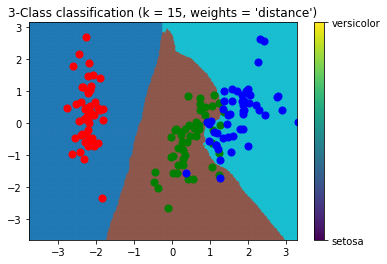

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#----parameters-----------------------------------------------------
#
n_neighbors = 15
weight = 'distance'
#
n_components = 2
#------------------------------------------------------------------
#
#-data-------------------------------------------------------------
#
# Merkmale des Datensatzes laden
iris_features = df_man.loc[:, skBunch_iris['feature_names']].values

# Klassenziffern laden
iris_targets = skBunch_iris['target']

# Merkmale skalieren
iris_features_std = StandardScaler().fit_transform(iris_features)
#
#------------------------------------------------------------------
#
#-PCA--------------------------------------------------------------
#
# PCA Instanz mit n_components erzeugen
pca = PCA(n_components=n_components)
#
principal_components = pca.fit_transform(iris_features_std)
#
principal_df = pd.DataFrame(data=principal_components, columns=['PCA_1', 'PCA_2'])
#
final_df = pd.concat([principal_df, df_man['class']], axis=1)
#
#-----------------------------------------------------------------
# die Daten in einen Trainingssatz und einen Testsatz teilen
#
x_train, x_test, y_train, y_test = train_test_split(final_df.iloc[:,:2].values, iris_targets, test_size = 0.33, random_state=0)
#
# create KNeighborsClassifier
KN = KNeighborsClassifier(n_neighbors=nNeighbors, weights=weight)
# model anpassen
KN.fit(x_train, y_train)
# 
# Netzgitter erstellen um das Modell auswerten zu können
# Ein Netzgitter kann verwendet werden, um Farben auf ähnliche Bereiche aufzufüllen, was beim Clustering hilfreich ist.
#
h=0.02
#
# die Extrema in beiden Merkmalen finden, um die Größe des Maschengitters zu definieren
# meshgrid() gibt eine matrix für x and y Richtung zurück
#
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = meshgrid(arange(x_min, x_max, h), arange(y_min, y_max, h))
#
# Cluster auf dem Raster vorhersagen
test = KN.predict(c_[xx.ravel(), yy.ravel()])
test = test.reshape(xx.shape)  # den predict()-Spaltenvektor in die Form des Maschengitters umformen
#
# Ergebnis in ein Farbplot ausgeben
plt.pcolormesh(xx, yy, test, cmap=plt.cm.tab10, alpha=0.6)
#
# 
# dieser Formatierer wird den Farbbalken mit den korrekten Zielnamen beschriften
formatter = plt.FuncFormatter(lambda i, *args: skBunch_iris.target_names[int(i)])

# Trainingsdatensatz darstellen
targets = skBunch_iris['target_names']
colors = ['r','g','b']
for target, color in zip(targets, colors):
    inidicesToKeep = final_df['class'] == target
    plt.scatter(final_df.loc[inidicesToKeep, 'PCA_1'],
              final_df.loc[inidicesToKeep, 'PCA_2'],
              c=color,
              s=50)
# colorbar
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (nNeighbors, weight))
#
plt.show()

**confusion matrix**

die confusion matrix zu den klassifizierten Daten nach einer PCA:

Text(0.5, 1.0, 'confusion matrix')

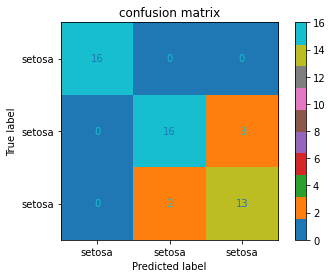

In [7]:
## confusion matrix
#
conm = plot_confusion_matrix(KN, x_test, y_test,
                            display_labels = class_names,
                            cmap=plt.cm.tab10,
                            normalize=None)
conm.ax_.set_title("confusion matrix")


Copyright © 2020 IUBH Internationale Hochschule